In [39]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

Download MNIST Dataset : 70.000 small images of digits Handwritten

In [40]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
% cd './drive/My Drive/Data_Science_Project/Hands_On_ML/Ch3.Classification'

[Errno 2] No such file or directory: './drive/My Drive/Data_Science_Project/Hands_On_ML/Ch3.Classification'
/content/drive/My Drive/Data_Science_Project/Hands_On_ML/Ch3.Classification


------------------------------------------------------------------------
Binaray Classification

In [42]:
X, y = mnist["data"], mnist["target"]

In [43]:
X.shape #70.000 image => each image has 784 feature
#Binary_images => 1 canal => 784 = 28x18 pixel

(70000, 784)

In [44]:
y.shape

(70000,)

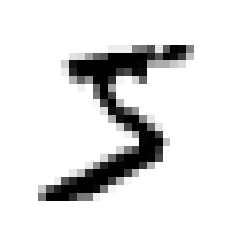

In [142]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [46]:
y[0] #The Label is a string 

'5'

In [47]:
import numpy as np
y = y.astype(np.uint8) #Most ML Algorithms Work with Numerical Arrays

In [48]:
y[0]

5

2. Creating Training and Test Splits

In [49]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

3. Training a Bianray Classifier

In [50]:
# "5-detector" : Distingue if a dejit is either 5 or not 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [51]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
#We can detect images of the number 5
sgd_clf.predict([X[0]])

array([ True])

In [53]:
sgd_clf.predict([X[11]])

array([ True])

In [54]:
sgd_clf.predict([X[1]])

array([False])

4. Evaluate The Model Performance 

In [55]:
#Evaluating a classifier id significantly trickier than evaluating a regressor
##########################################################################
#Measuring Accuracy using Cross_Validation 
from sklearn.model_selection import StratifiedKFold #produce folds that contain a representative ratio of each class
from sklearn.base import clone 

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#More than 95% accuracy on all cross_validation folds 
#Thta's beacause Only about 10% of the images are 5s

array([0.95035, 0.96035, 0.9604 ])

In [57]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [58]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [59]:
#############################################################
#Confusion Matrix : Better way to evaluate the performance of classifier
#Genearal idea : Count the number of times where class A are classified as class B
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) 
#True Negative    False Positive => The negative Class 
#False Negative   True Positive  => The Positive Class

array([[53892,   687],
       [ 1891,  3530]])

In [61]:
y_train_perfect_predictions = y_train_5 #A perfect classifier will only have true positives and true negatives
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [67]:
#Confusion Matrix gives us a lot of information 
#But we prefer The "Precision" = True_Positive / (True_Positive + False_Positive)
#The pourcentage of True_Positive 
#Or The "Recall" = True_Positive / (True_Positive + False_Negative)
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) #3530 / (3530 + 687) = 83%
print(recall_score(y_train_5, y_train_pred)) #3530 / (3530 + 1891) = 65%

0.8370879772350012
0.6511713705958311


In [66]:
#Perfect Prediction : Precision = 100%, Recall = 100%
print(precision_score(y_train_5, y_train_perfect_predictions)) 
print(recall_score(y_train_5, y_train_perfect_predictions))

1.0
1.0


In [70]:
#Combine Recall And Precision Into One Metric called F1 = 2 x [(precision x recall) / (precision + recall)]
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) #73%

0.7325171197343846

In [72]:
f1_score(y_train_5, y_train_perfect_predictions) #100%

1.0

The F1 score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other contexts
you really care about recall. For example, if you trained a classifier to detect videos
that are safe for kids, you would probably prefer a classifier that rejects many
good videos (low recall) but keeps only safe ones (high precision), rather than a classifier
that has a much higher recall but lets a few really bad videos show up in your
product (in such cases, you may even want to add a human pipeline to check the classifier’s
video selection). On the other hand, suppose you train a classifier to detect
shoplifters in surveillance images: it is probably fine if your classifier has only 30%
precision as long as it has 99% recall (sure, the security guards will get a few false
alerts, but almost all shoplifters will get caught).

In [75]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [79]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred 

array([ True])

In [82]:
threshold = 8000 #raising the threshold decreases recall.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [83]:
#Decide which threshold choose
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [106]:
#use the precision_recall_curve() function to compute precision
#and recall for all possible thresholds:¨
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [86]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
# highlight the threshold and add the legend, axis label, and grid

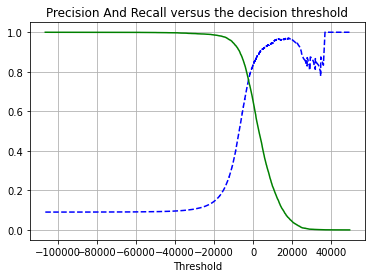

In [107]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlabel("Threshold")
plt.title("Precision And Recall versus the decision threshold")
plt.grid()
plt.show()
#Green => Recal
#Blue => Precision

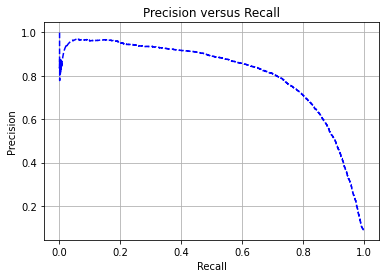

In [108]:
plt.plot(recalls, precisions, "b--")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision versus Recall")
plt.grid()
plt.show()

In [109]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [110]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [111]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

If someone says, “Let’s reach 99% precision,” you should ask, “At
what recall?”

A high-precision classifier is not very useful if its
recall is too low!

In [112]:
###################################################################
#The ROC Curve : Receiver Operating Characteristic
#Tool used to binary classification 
#Plot True_Positive_Rate (Recall) and False_Positive_Rate
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [113]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
  plt.xlabel("False_Positive_Rate FPR")
  plt.ylabel("True_Positive_Rate TPR")
  plt.grid()

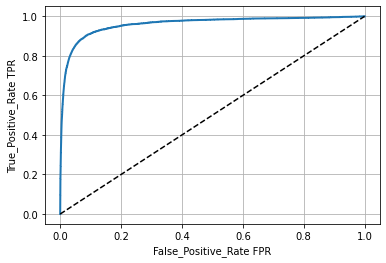

In [114]:
plot_roc_curve(fpr, tpr)
plt.show()

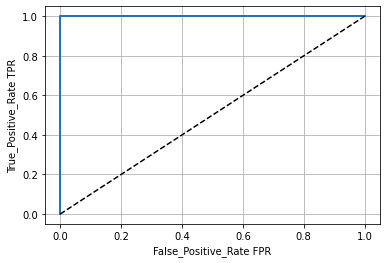

In [115]:
fpr1, tpr1, thresholds1 = roc_curve(y_train_5, y_train_perfect_predictions)
plot_roc_curve(fpr1, tpr1)
plt.show()

In [116]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Train Random Forest Classifier and Compare ROC , et ROC AUC

In [118]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [120]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

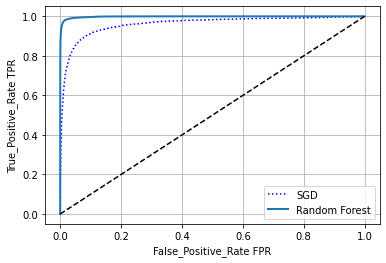

In [121]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [123]:
roc_auc_score(y_train_5, y_scores_forest) #99% precision + 86% Recall => Not Bad

0.9983436731328145

You now know how to train binary classifiers, choose the appropriate metric for your
task, evaluate your classifiers using cross-validation, select the precision/recall tradeoff
that fits your needs, and use ROC curves and ROC AUC scores to compare various
models. Now let’s try to detect more than just the 5s.

-----------------------------------------------------------
Multiclass Classification 

In [124]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) #y_train and not y_train_5
svm_clf.predict([some_digit])
#when you try to use a binary classification algorithm for a multiclass
#classification task, and it automatically runs OvR or OvO, depending on the
#algorithm.

array([5], dtype=uint8)

In [125]:
#OVO Strategy : It trained 45 binary classifier 
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

10 scores : 10 per instance (0-9)

Class 5 : High score 9,31



In [126]:
np.argmax(some_digit_scores)

5

In [127]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [128]:
svm_clf.classes_[5]

5

When a classifier is trained, it stores the list of target classes in its
classes_ attribute, ordered by value. In this case, the index of each
class in the classes_ array conveniently matches the class itself


In [130]:
#Force sickit_learn to use One_Vs_One or One_Vs_the_Rest classifier:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [131]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [132]:
len(ovr_clf.estimators_)

10

In [133]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [145]:
sgd_clf.predict([X[11]])

array([5], dtype=uint8)

In [147]:
#Decision function return one value per class => High value for 5 class
sgd_clf.decision_function([X[11]])

array([[-30446.28807622, -20771.5971377 ,  -4069.97324426,
         -7297.18084344,  -2335.35560779,   3839.63697115,
        -27845.48223256, -11660.53889926,   -540.54962964,
        -11918.2854924 ]])

In [148]:
#Evaluate The Classifier 
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

85% of accuracy per folds

we can increase it => scaling 

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

ERROR ANALYSIS

In [150]:
#We have found the promising model and we try to improve it
#for that one way is to analyze the types of errors it makes 
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

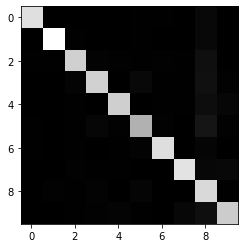

In [152]:
plt.imshow(conf_mx, cmap=plt.cm.gray)
plt.show()

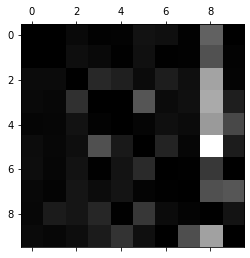

In [153]:
#compare error rates instead of absolute numbers of errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

rows represent actual classes, while 
columns represent predicted classes.

8 is quite bright, which tells you that many images get misclassified as 8s.

Solution :  try to gather more training data for digits that
look like 8s (but are not) so that the classifier can learn to distinguish them from real
8s.

In [154]:
#Analyzing individual errors
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [160]:
import matplotlib
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

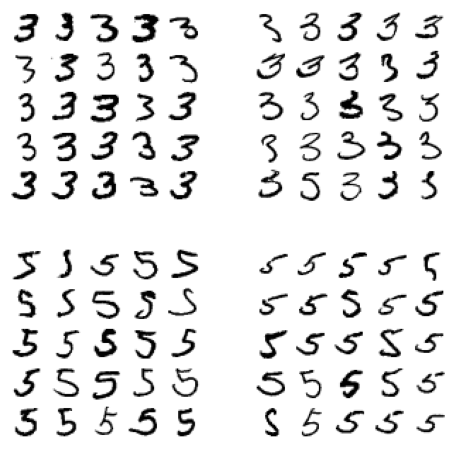

In [162]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()
#The two 5 × 5 blocks on the left show digits classified as 3s
#The two 5 × 5 blocks on the right show images classified as 5s.

The main difference between 3s and 5s is the position of the small line that joins the
top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left,
the classifier might classify it as a 5, and vice versa. In other words, this classifier is
quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion
would be to preprocess the images to ensure that they are well centered and not too
rotated. This will probably help reduce other errors as well.

---------------------------------------
MultiLbael Classification 
the classifier has been
trained to recognize three faces, Alice, Bob, and Charlie. Then when the classifier is
shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes,
Bob no, Charlie yes”). Such a classification system that outputs multiple binary tags is
called a multilabel classification system.

In [163]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [165]:
knn_clf.predict([some_digit]) #5 is not large and odd

array([[False,  True]])

In [166]:
#There are many ways to evaluate a multilabel classifier, and selecting the right metric
#One approach is to measure the F1 score for each individual label 
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

-----------------------------------------
Multioutput Classification
It is simply a generalization
of multilabel classification where each label can be multiclass

In [167]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

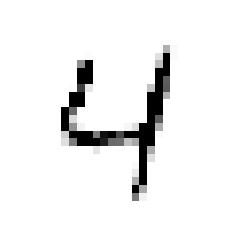

In [172]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[4]])
plot_digits(clean_digit)